In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()


In [159]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [160]:
#filtering out days when pagview were in the bottom 2.5% and top 2.5%
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df['date']= pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [161]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [162]:
def draw_line_plot():
 
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='red', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Set custom x-ticks
    ticks = pd.date_range(start='2016-07-01', periods=8, freq='6MS')
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks.strftime('%Y-%m'))
    plt.close(fig)

    return fig


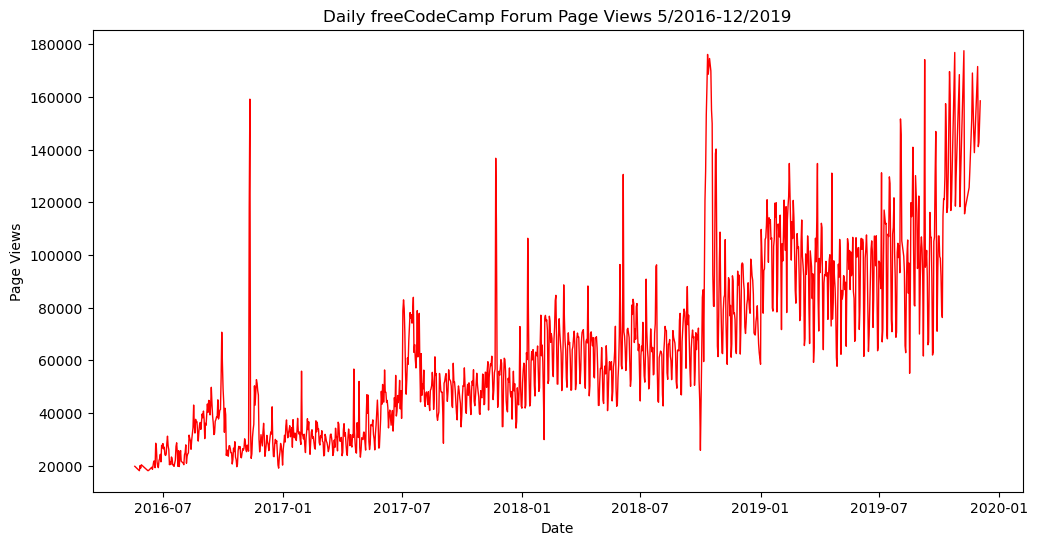

In [163]:
draw_line_plot()


Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [172]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month_name()


    # Create a pivot table  
    #whatever the x axis is will be the index
    df_bar = df_bar.pivot_table(index='year', columns='month', values='value', aggfunc='mean')
    # Reorder the months
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar.reindex(columns=months_order)
    df_bar.head()
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot(kind='bar', ax=ax, color=sns.color_palette("pastel"))

    ax.set_title('Average Page Views per Month')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    plt.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.close()
    return fig
        
    
    
    

df_bar = df.groupby([df.index.year, df.index.month]).sum()
df_bar.head()
plt.subplots(figsize=(12, 6))
plt.bar(data=df, x='month', y='value', hue='year', ci=None)
    

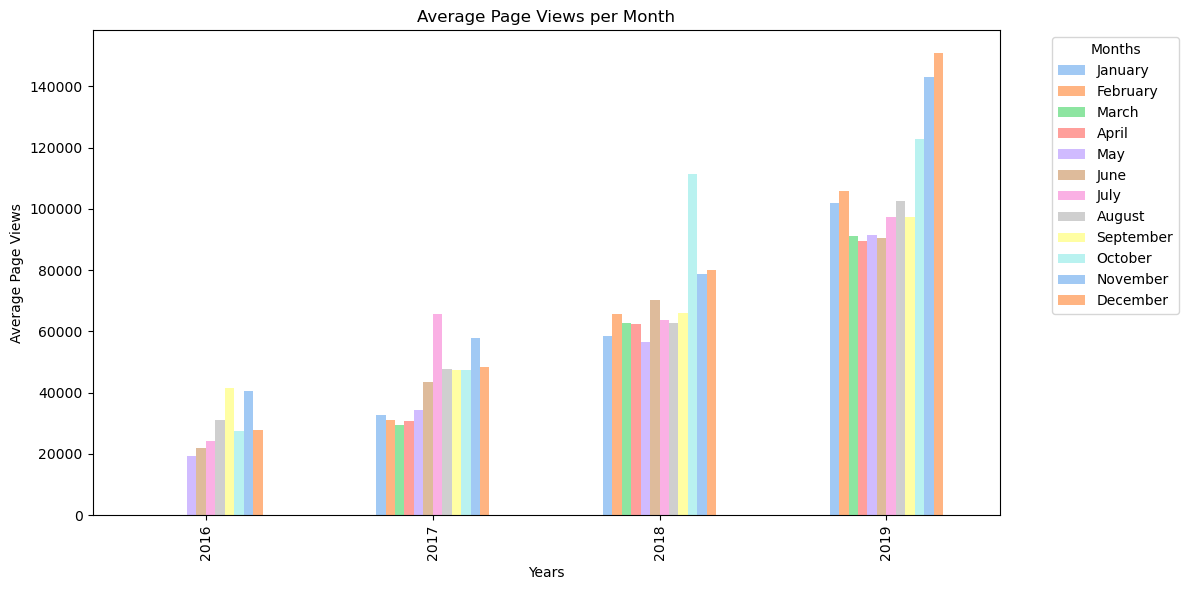

In [173]:
draw_bar_plot() 

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [166]:
def draw_box_plot():
    # Patch np.float if needed
    #np.float = float

    # Prepare data
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month_name().str.slice(0, 3)
    df_box['month'] = pd.Categorical(
        df_box['month'],
        categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        ordered=True
    )

    # Create single figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise box plot
    sns.boxplot(data=df_box, x='year', y='value', palette='pastel', hue= 'year', fliersize=0.5, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[0].set_ylim(0, 200000)
    axes[0].set_yticks(np.arange(0, 200001, 20000))
    # Month-wise box plot
    sns.boxplot(data=df_box, x='month', y='value', palette='pastel', hue='month', fliersize=0.5, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    axes[1].set_ylim(0, 200000)
    axes[1].set_yticks(np.arange(0, 200001, 20000))

    # Final adjustments
    plt.tight_layout()
    plt.close()
    # Save and return figure
    return fig

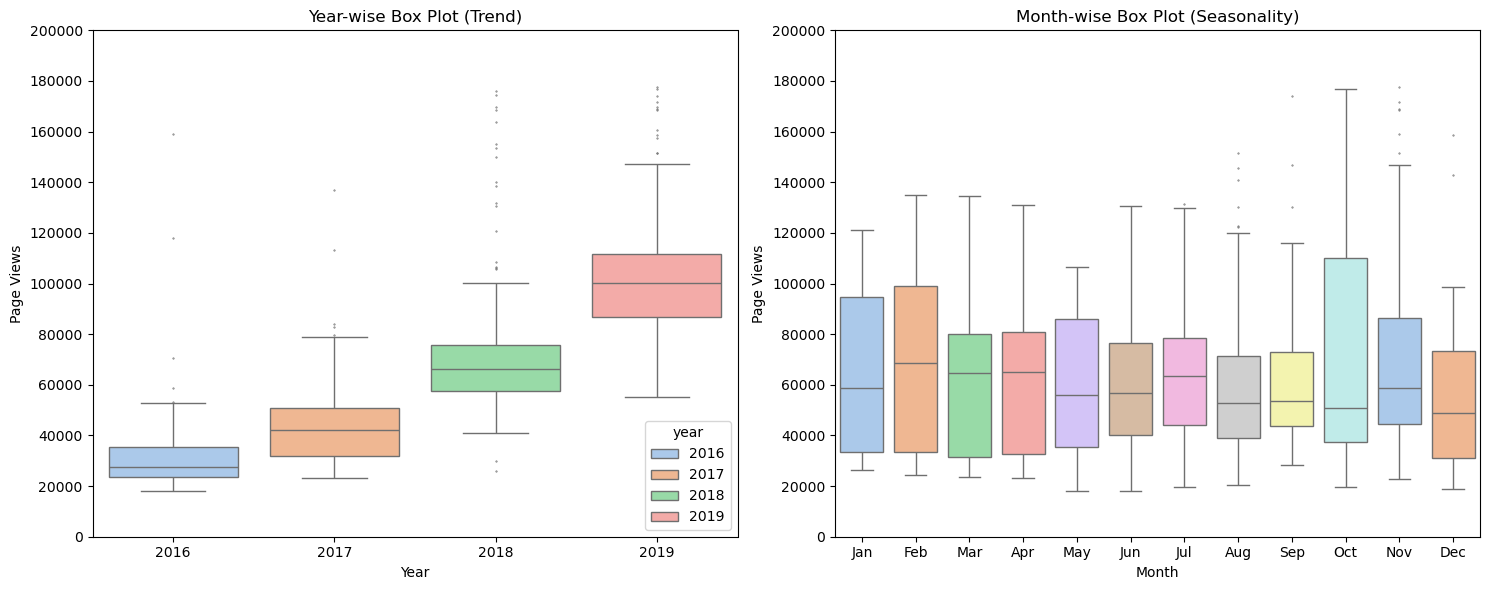

In [167]:
draw_box_plot()